# Data Validation

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from readable_number import ReadableNumber

In [2]:
sales = pd.read_csv(r'./Dataset/Product Sales.csv')

In [3]:
sales.head()

,week,sales_method,customer_id,nb_sold,revenue,years_as_customer,nb_site_visits,state
0,2,Email,2e72d641-95ac-497b-bbf8-4861764a7097,10,NaN,0,24,Arizona
1,6,Email + Call,3998a98d-70f5-44f7-942e-789bb8ad2fe7,15,225.47,1,28,Kansas
2,5,Call,d1de9884-8059-4065-b10f-86eef57e4a44,11,52.55,6,26,Wisconsin
3,4,Email,78aa75a4-ffeb-4817-b1d0-2f030783c5d7,11,NaN,3,25,Indiana
4,3,Email,10e6d446-10a5-42e5-8210-1b5438f70922,9,90.49,0,28,Illinois


In [4]:
sales.tail()

,week,sales_method,customer_id,nb_sold,revenue,years_as_customer,nb_site_visits,state
14995,4,Call,17267b41-d048-4346-8b90-7f787690a836,10,50.82,0,22,Pennsylvania
14996,5,Call,09e10d6f-4508-4b27-895e-4db11ce8302b,10,52.33,1,27,Kansas
14997,1,Call,839653cb-68c9-48cb-a097-0a5a3b2b298b,7,34.87,4,22,West Virginia
14998,6,Call,e4dad70a-b23b-407c-8bd3-e32ea00fae17,13,64.90,2,27,New Jersey
14999,5,Email + Call,4e077235-7c17-4054-9997-7a890336a214,13,NaN,4,25,Illinois


In [5]:
sales.size

120000

There are 1,20,000 values in the dataset.

In [6]:
sales.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   week               15000 non-null  int64  
 1   sales_method       15000 non-null  object 
 2   customer_id        15000 non-null  object 
 3   nb_sold            15000 non-null  int64  
 4   revenue            13926 non-null  float64
 5   years_as_customer  15000 non-null  int64  
 6   nb_site_visits     15000 non-null  int64  
 7   state              15000 non-null  object 
dtypes: float64(1), int64(4), object(3)
memory usage: 3.4 MB


The dataset contains 15,000 records. <br>
The `revenue` column has 1,074 missing values. 

**revenue**

In [7]:
sales[sales['revenue'].isna()].head(20)

,week,sales_method,customer_id,nb_sold,revenue,years_as_customer,nb_site_visits,state
0,2,Email,2e72d641-95ac-497b-bbf8-4861764a7097,10,NaN,0,24,Arizona
3,4,Email,78aa75a4-ffeb-4817-b1d0-2f030783c5d7,11,NaN,3,25,Indiana
16,2,Email,0f744f79-1588-4e0c-8865-fdaecc7f6dd4,10,NaN,6,30,Pennsylvania
17,6,Email + Call,d10690f0-6f63-409f-a1da-8ab0e5388390,15,NaN,0,24,Wisconsin
28,5,Email,f64f8fd5-e9b7-4326-9f5d-ef283f14d7ad,12,NaN,4,32,Florida
35,1,Email,844db26b-028e-4251-ad72-b7fde9cf8ca0,9,NaN,1,26,Arizona
41,5,Email,027f0947-4c19-4bf4-a5f4-150f9deae826,10,NaN,1,32,New Mexico
108,3,Email,29895ef8-9b50-4422-8a18-598efedb3803,11,NaN,6,31,Texas
110,2,Email + Call,c21cd0cf-c3ab-4e39-8ea0-da55f8f09bc5,11,NaN,3,25,Louisiana
138,5,Email + Call,44275854-d501-4b59-89fe-52a013f09624,12,NaN,6,25,Indiana


In [8]:
print(f"Minimum Revenue: {sales['revenue'].min()}")
print(f"Maximum Revenue: {sales['revenue'].max()}")

Minimum Revenue: 32.54
Maximum Revenue: 238.32


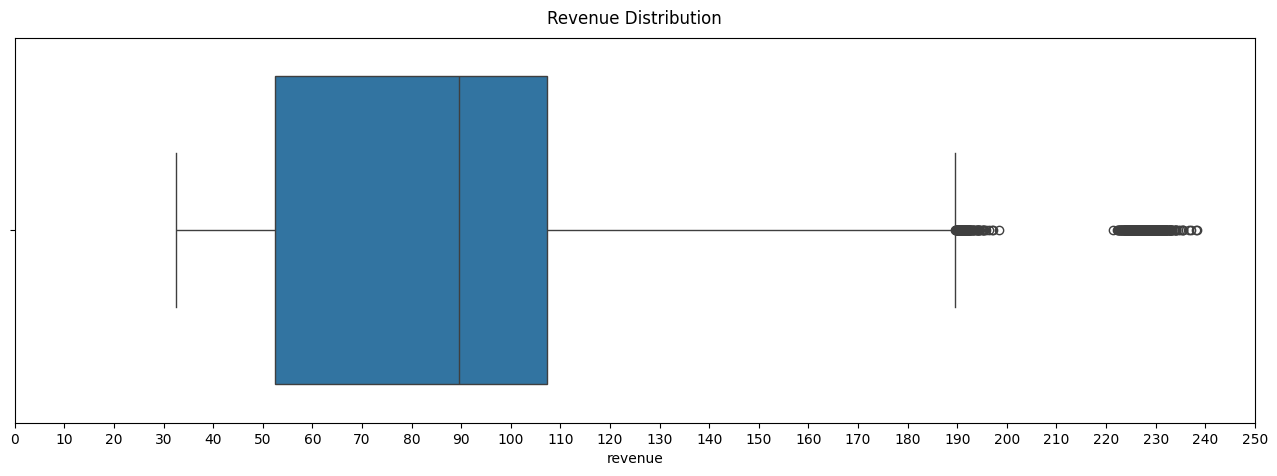

In [9]:
plt.figure(figsize=(16, 5))
sns.boxplot(x=sales['revenue'])
plt.title('Revenue Distribution', pad=10)
plt.xticks(range(0, 251, 10))
plt.show()

The maximum revenue is around \$238 which is very high when compared with other records. However, the dataset contains records for multiple products and each may have different price. Therefore, this revenue is possible especially when the company also sells desks and monitors.

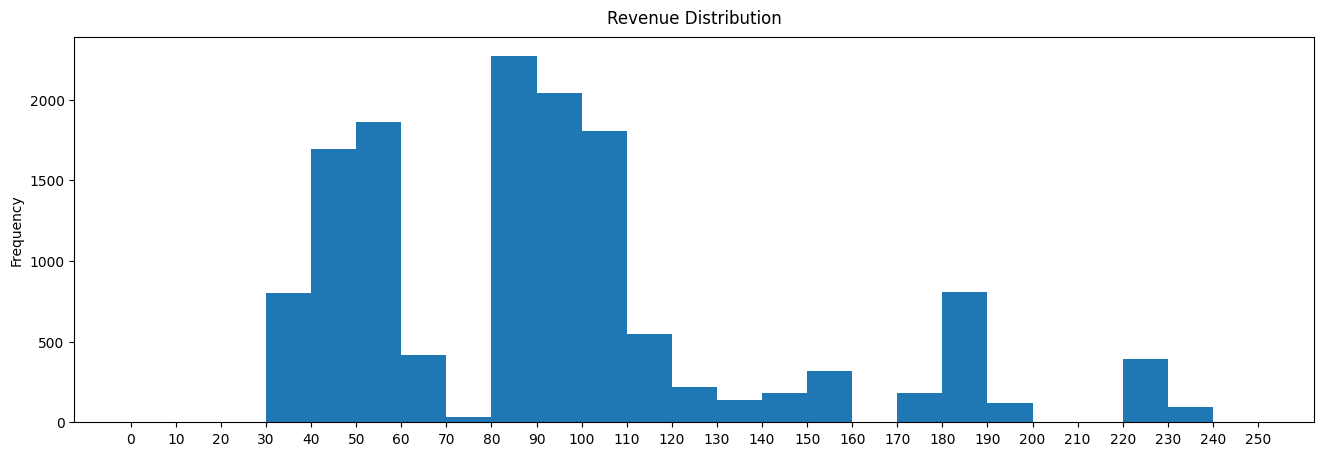

In [10]:
plt.figure(figsize=(16, 5))
sales['revenue'].plot(kind='hist', bins=range(0, 251, 10))
plt.title('Revenue Distribution', pad=10)
plt.xticks(range(0, 251, 10))
plt.show()

The above plot shows two main segments, and another small segment towards the higher end. Let's see if the revenue is related to `sales_method`.

In [11]:
sales['sales_method'].unique()

array(['Email', 'Email + Call', 'Call', 'em + call', 'email'],
      dtype=object)

There are inconsistent categories in `sales_method`.

In [12]:
sales_methods = {
    'Email': 'Email',
    'Email + Call': 'Email + Call',
    'Call': 'Call',
    'em + call': 'Email + Call',
    'email': 'Email'
}
sales['sales_method'] = sales['sales_method'].map(sales_methods)
sales['sales_method'].unique()

array(['Email', 'Email + Call', 'Call'], dtype=object)

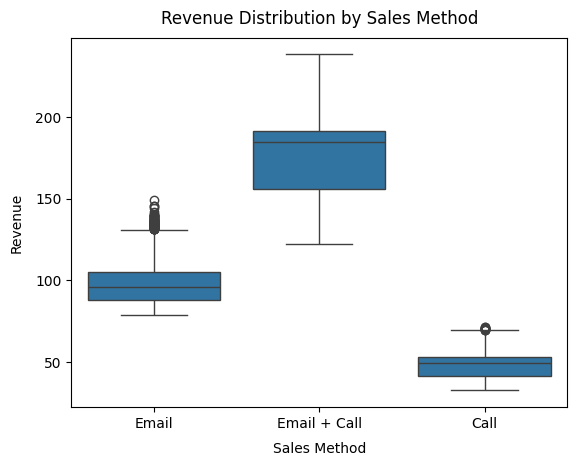

In [13]:
sns.boxplot(x='sales_method', y='revenue', data=sales)
plt.title('Revenue Distribution by Sales Method', pad=10)
plt.xlabel('Sales Method', labelpad=8)
plt.ylabel('Revenue', labelpad=8)
plt.show()

The revenue distributions vary significantly across the three sales methods, indicating non-uniform missing value patterns.

In [14]:
sales.groupby('sales_method', as_index=False).agg({'revenue': ['count', 'mean', 'median', 'min', 'max']})

sales_method revenue                                    
                  count        mean  median     min     max
0          Call    4781   47.597467   49.07   32.54   71.36
1         Email    6922   97.127684   95.58   78.83  148.97
2  Email + Call    2223  183.651233  184.74  122.11  238.32

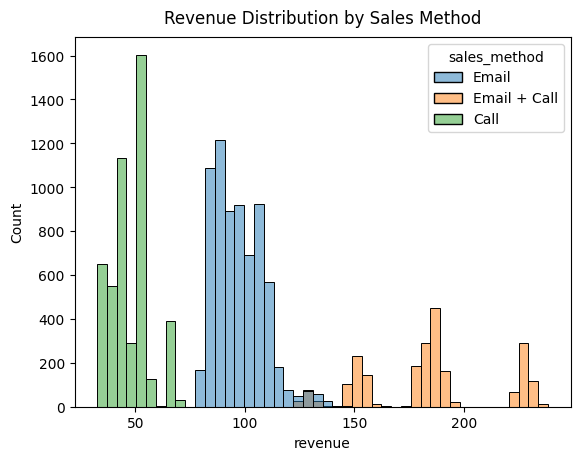

In [15]:
sns.histplot(x='revenue', data=sales, hue='sales_method', alpha=0.5)
plt.title('Revenue Distribution by Sales Method', pad=10)
plt.show()

The mean and median revenue is very similar for each sales method. <br> I will replace the missing values with *median* based on `sales_method` due to its robustness.

In [16]:
revenue_fillna_values = {
    'Email': sales[sales['sales_method']=='Email']['revenue'].median(),
    'Call': sales[sales['sales_method']=='Call']['revenue'].median(),
    'Email + Call': sales[sales['sales_method']=='Email + Call']['revenue'].median()
}

In [17]:
sales['revenue'] = sales['revenue'].fillna(sales['sales_method'].map(revenue_fillna_values))
sales['revenue'].isna().sum()

np.int64(0)

In [18]:
sales.groupby('sales_method', as_index=False).agg({'revenue': ['count', 'mean', 'median', 'min', 'max']})

sales_method revenue                                    
                  count        mean  median     min     max
0          Call    4962   47.651181   49.07   32.54   71.36
1         Email    7466   97.014914   95.58   78.83  148.97
2  Email + Call    2572  183.798970  184.74  122.11  238.32

In [19]:
sales.describe(include='all')

,week,sales_method,customer_id,nb_sold,revenue,years_as_customer,nb_site_visits,state
count,15000.000000,15000,15000,15000.000000,15000.000000,15000.000000,15000.000000,15000
unique,NaN,3,15000,NaN,NaN,NaN,NaN,50
top,NaN,Email,4e077235-7c17-4054-9997-7a890336a214,NaN,NaN,NaN,NaN,California
freq,NaN,7466,1,NaN,NaN,NaN,NaN,1872
mean,3.098267,NaN,NaN,10.084667,95.565964,4.965933,24.990867,NaN
std,1.656420,NaN,NaN,1.812213,47.985182,5.044952,3.500914,NaN
min,1.000000,NaN,NaN,7.000000,32.540000,0.000000,12.000000,NaN
25%,2.000000,NaN,NaN,9.000000,52.650000,1.000000,23.000000,NaN
50%,3.000000,NaN,NaN,10.000000,90.950000,3.000000,25.000000,NaN
75%,5.000000,NaN,NaN,11.000000,107.750000,7.000000,27.000000,NaN


The maximum value for `years_as_customer` is 63 years. This is not possible as the company was founded in 1984 (41 years ago). This needs to be investigated further before analysis.

**years_as_customer**

In [20]:
(sales['years_as_customer'].value_counts(normalize=True)*100).sort_index()

years_as_customer
0      9.806667
1     16.693333
2     13.246667
3     10.793333
4      8.920000
5      7.453333
6      6.120000
7      4.726667
8      4.053333
9      3.393333
10     2.700000
11     2.120000
12     1.893333
13     1.593333
14     1.113333
15     1.000000
16     0.820000
17     0.586667
18     0.546667
19     0.386667
20     0.360000
21     0.246667
22     0.286667
23     0.140000
24     0.180000
25     0.126667
26     0.146667
27     0.100000
28     0.053333
29     0.033333
30     0.060000
31     0.040000
32     0.033333
33     0.053333
34     0.053333
35     0.033333
36     0.026667
37     0.013333
38     0.013333
39     0.020000
47     0.006667
63     0.006667
Name: proportion, dtype: float64

In [21]:
sales[sales['years_as_customer']>41]

,week,sales_method,customer_id,nb_sold,revenue,years_as_customer,nb_site_visits,state
13741,2,Email,18919515-a618-430c-9a05-2c7d8fea96af,10,97.22,63,24,California
13800,4,Call,2ea97d34-571d-4e1b-95be-fea1c404649f,10,50.47,47,27,California


There are only two records with invalid values for `years_as_customer`. These can be replaced with the highest possible value (41).

In [22]:
sales.loc[sales['years_as_customer']>41, 'years_as_customer'] = 41
(sales['years_as_customer']>41).sum()

np.int64(0)

**week**

In [23]:
sales['week'].unique()

array([2, 6, 5, 4, 3, 1])

**nb_sold**

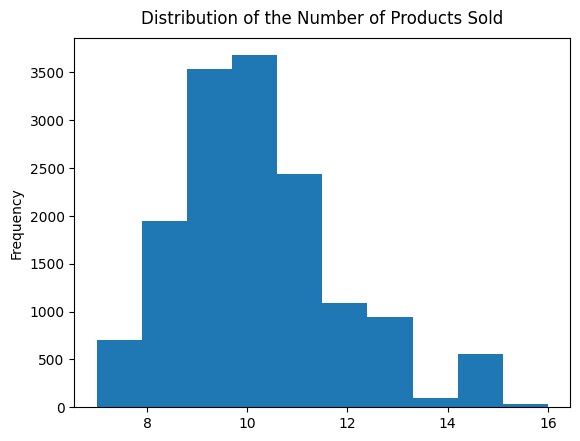

In [24]:
sales['nb_sold'].plot(kind='hist')
plt.title('Distribution of the Number of Products Sold', pad=10)
plt.show()

**site_visits**

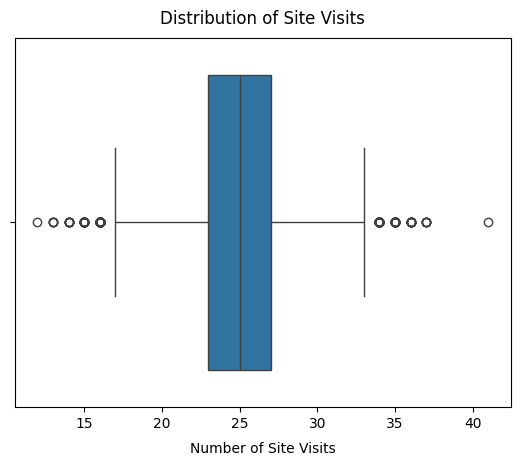

In [25]:
sns.boxplot(sales['nb_site_visits'], orient='h')
plt.title('Distribution of Site Visits', pad=10)
plt.xlabel('Number of Site Visits', labelpad=8)
plt.show()

In [26]:
print(f"Minimum Site Visits: {sales['nb_site_visits'].min()}")
print(f"Maximum Site Visits: {sales['nb_site_visits'].max()}")

Minimum Site Visits: 12
Maximum Site Visits: 41


**state**

In [27]:
sales['state'].unique()

array(['Arizona', 'Kansas', 'Wisconsin', 'Indiana', 'Illinois',
       'Mississippi', 'Georgia', 'Oklahoma', 'Massachusetts', 'Missouri',
       'Texas', 'New York', 'Maryland', 'California', 'Tennessee',
       'Pennsylvania', 'North Dakota', 'Florida', 'Michigan',
       'North Carolina', 'Hawaii', 'Colorado', 'Louisiana', 'Virginia',
       'New Mexico', 'Arkansas', 'Alaska', 'Oregon', 'New Hampshire',
       'Ohio', 'New Jersey', 'Connecticut', 'Iowa', 'Montana',
       'Washington', 'Kentucky', 'Alabama', 'Nebraska', 'South Carolina',
       'Minnesota', 'South Dakota', 'Delaware', 'Maine', 'Utah',
       'West Virginia', 'Vermont', 'Rhode Island', 'Nevada', 'Idaho',
       'Wyoming'], dtype=object)

In [28]:
sales.duplicated().sum()

np.int64(0)

There are no duplicate records in the dataset.

In [29]:
sales.isna().sum()

week                 0
sales_method         0
customer_id          0
nb_sold              0
revenue              0
years_as_customer    0
nb_site_visits       0
state                0
dtype: int64

In [30]:
sales.nunique()

week                     6
sales_method             3
customer_id          15000
nb_sold                 10
revenue               6743
years_as_customer       41
nb_site_visits          27
state                   50
dtype: int64

The raw dataset contained 15,000 rows and 8 columns. There were some missing values and inconsistent records which I have cleaned.

- week: 1-6 weeks without missing values. No cleaning is needed.
- sales_method: 5 categories, 2 of which are inconsistencies. Corrected spelling mistakes.
- customer_id: Characters without missing values, same as the description. No cleaning is needed.
- nb_sold: Numeric values ranging from 7 to 16. Does not contain missing values. No cleaning is needed.
- revenue: Contains 1,074 missing values. I filled these with median based on the `sales_method`.
- years_as_customer: Numeric values, contains two invalid entries. Replaced these with the highest possible value.
- nb_site_visits: Numeric values ranging from 0 to 41. No missing values. No cleaning is needed.
- state: Location of the customer, same as description. Doesn't contain missing values. No cleaning is needed. 

After the data validation, the dataset contains 15,000 rows and 8 columns without inconsistenties.

# Exploratory Analysis

In [31]:
total_customers = ReadableNumber(sales['customer_id'].size)
f"Total Customers: {total_customers}"

'Total Customers: 15,000'

In [32]:
total_nb_products_sold = ReadableNumber(sales['nb_sold'].sum())
f"Total Number of Products Sold: {total_nb_products_sold}"

'Total Number of Products Sold: 151,270'

In [33]:
total_revenue = ReadableNumber(sales['revenue'].sum(), use_shortform=True, precision=2)
f"Total Revenue generated: ${total_revenue}"

'Total Revenue generated: $1.43M'

In [34]:
avg_site_visits = sales['nb_site_visits'].mean()
f"Average site visits: {avg_site_visits:.0f}"

'Average site visits: 25'

## How many customers were there for each sales approach?

There are 15,000 customers.
Almost half of these were acquired through email-only campaigns, 33% through call-only campaigns, and 17% via both channels.

In [35]:
total_customers_by_sales_method = sales.groupby('sales_method', as_index=False).agg(
    total_customers=('customer_id', 'count')).sort_values(by='total_customers', ascending=False)

In [36]:
sales_method_palette = {'Email': '#004E9B', 'Call': '#3DB87F', 'Email + Call': '#FFD500'}

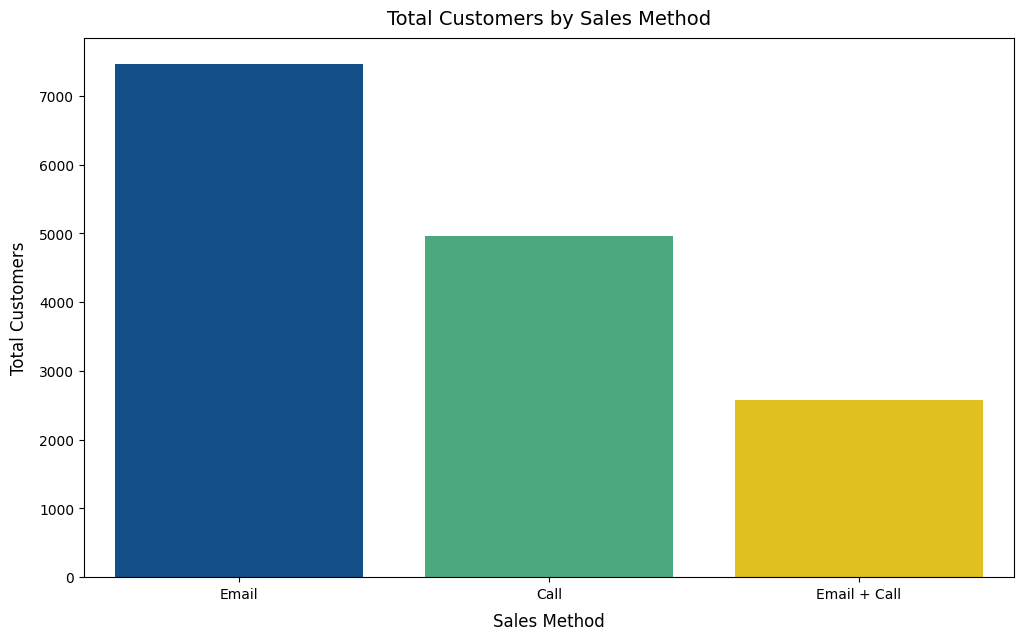

In [37]:
plt.figure(figsize=(12, 7))
sns.barplot(x='sales_method', y='total_customers', data=total_customers_by_sales_method, hue='sales_method', palette=sales_method_palette)
plt.title('Total Customers by Sales Method', fontsize=14, pad=10)
plt.xlabel('Sales Method', fontsize=12, labelpad=8)
plt.ylabel('Total Customers', fontsize=12, labelpad=8)
plt.show()

## The number of customers acquired via each sales method changed over time.

Email was the predominant sales method in the initial launch period, capturing approximately 2,800 customers in the first week before experiencing a dramatic decline to just around 200 customers by week 6. <br>
Call-only and Email+Call methods maintained relatively consistent performance, with Call peaking above 1,000 customers and Email+Call showing moderate growth to around 800 customers by week 5. However, both these methods also declined in week 6, with the Call-only approach acquiring fewer than 500 customers and Email+Call dropping to near 600 customers.

This divergent performance patterns suggest Email may be most effective for launch periods, while the other two methods provide more predictable ongoing acquisition.

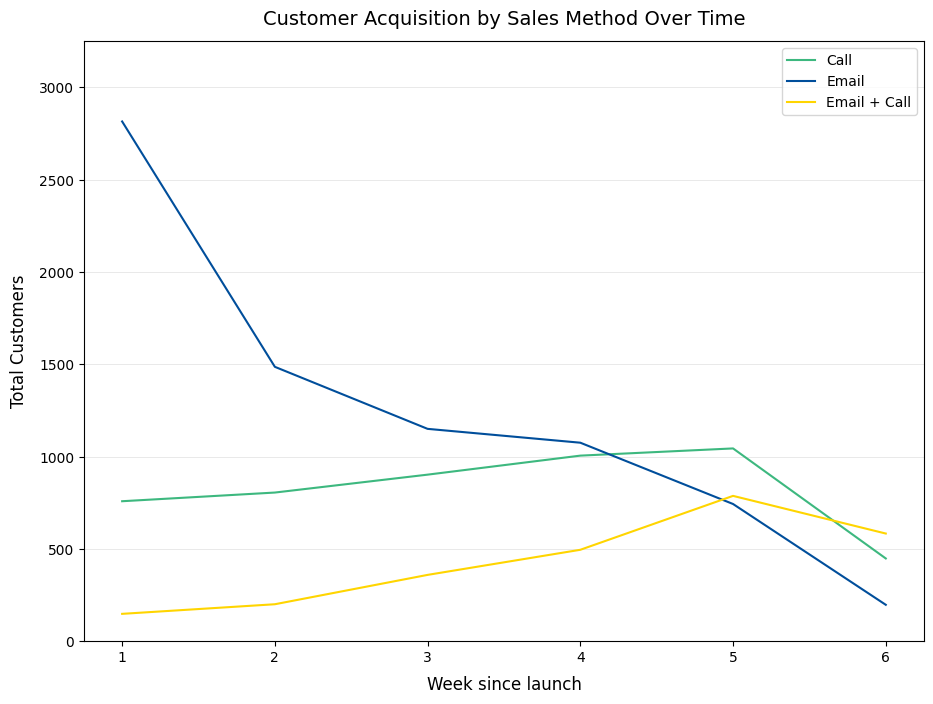

In [38]:
weekly_customers_count_by_sales_method = sales.groupby(['week', 'sales_method'])['customer_id'].size().reset_index(name='count')

plt.figure(figsize=(14, 10))
sns.lineplot(x='week', y='count', data=weekly_customers_count_by_sales_method, 
             hue='sales_method', palette=sales_method_palette, errorbar=None)

plt.legend(title='')
plt.title('Customer Acquisition by Sales Method Over Time', fontsize=14, pad=12)
plt.xlabel('Week since launch', fontsize=12, labelpad=8)
plt.ylabel('Total Customers', fontsize=12, labelpad=8)

plt.grid(True, axis='y', alpha=0.4, linestyle='-', linewidth=0.5)
plt.subplots_adjust(left=0.2, right=0.8, top=0.8, bottom=0.2)
plt.ylim(0, 3250)
plt.show()

## How much revenue was generated? And what does the overall spread looks like?

In [39]:
f"Total Revenue: ${sales['revenue'].sum():,}"

'Total Revenue: $1,433,489.46'

Across the entire 6-week period, all sales methods together generated \\$1.43 million in total revenue.  
The revenue distribution reveals two primary customer segments, with most transactions falling within the \\$40-60 and \\$80-110 ranges. There is also a small, high-value customer segment between \\$180-190.

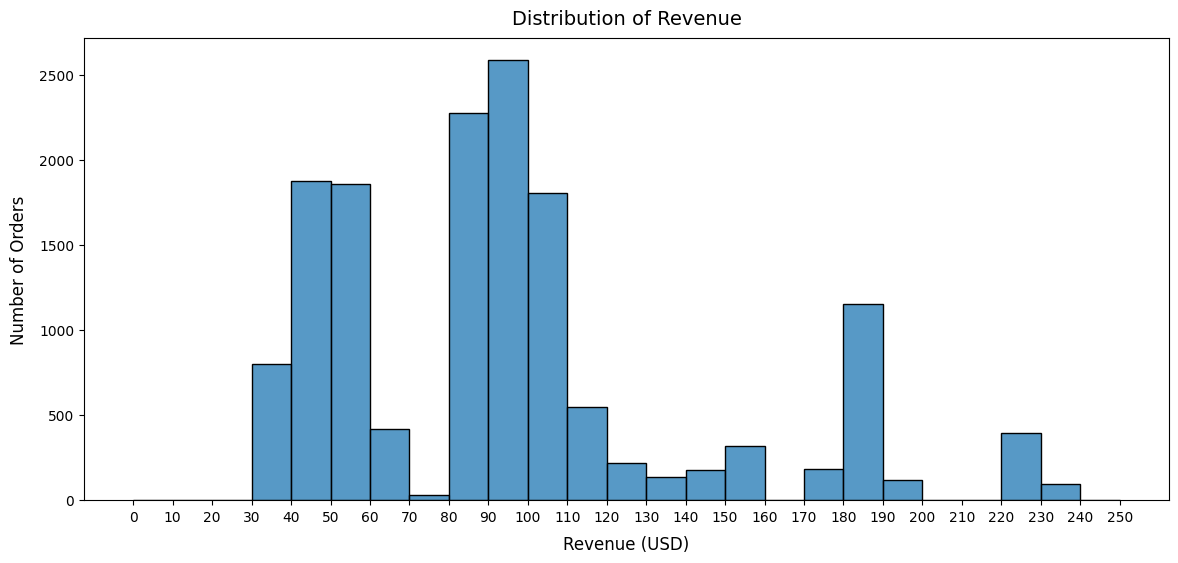

In [40]:
plt.figure(figsize=(14, 6))
sns.histplot(x=sales['revenue'], bins=range(0, 251, 10))
plt.xticks(range(0, 251, 10))
plt.title('Distribution of Revenue', fontsize=14, pad=10)
plt.xlabel('Revenue (USD)', fontsize=12, labelpad=8)
plt.ylabel('Number of Orders', fontsize=12, labelpad=8)
plt.show()

## What does the revenue and spread look like for each sales method?

Email+Call demonstrated the highest per-transaction value (\\$185 median) and contributed \\$473k in total revenue despite fewer customers. 
Email-only approach generated the most revenue (\\$724k) through high volume but lower per-transaction value (\\$95 median), while Call-only campaigns contributed least (\\$236k) with the lowest per-transaction potential (~\\$50 median).

This suggests that Email-only approach excels at volume-driven acquisition, while Email+Call maximizes revenue per customer. Call-only approach shows limited revenue effectiveness across both metrics.

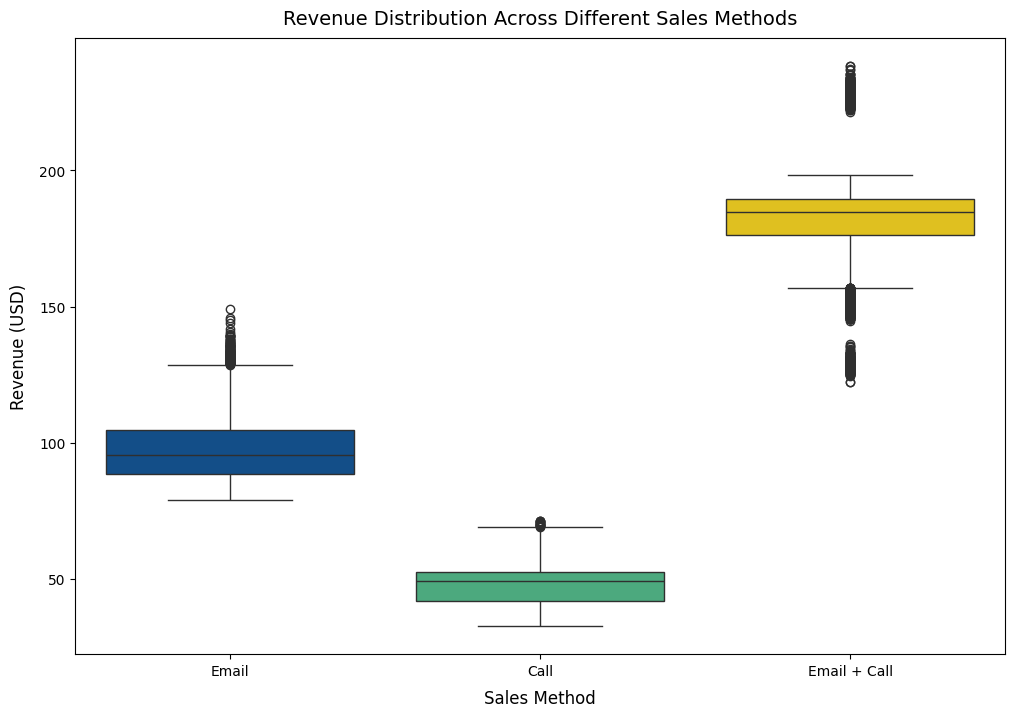

In [41]:
plt.figure(figsize=(12, 8))
ax = sns.boxplot(x='sales_method', y='revenue', data=sales, hue='sales_method', palette=sales_method_palette, order=['Email', 'Call', 'Email + Call'])
      
plt.title('Revenue Distribution Across Different Sales Methods', fontsize=14, pad=10)
plt.xlabel('Sales Method', fontsize=12, labelpad=8)
plt.ylabel('Revenue (USD)', fontsize=12, labelpad=8)
plt.show()

In [42]:
total_revenue_by_sales_method = sales.groupby('sales_method')['revenue'].sum().sort_values().reset_index(name='total_revenue')

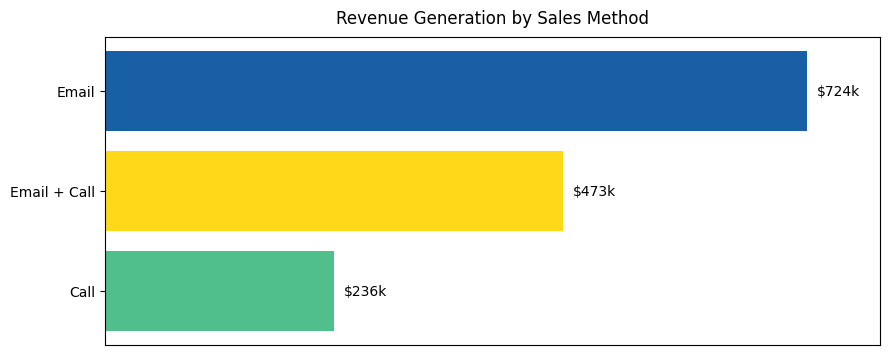

In [43]:
plt.figure(figsize=(10, 4))
bars = plt.barh(y='sales_method', width='total_revenue', 
    data=total_revenue_by_sales_method, 
    color=[sales_method_palette[method] for method in total_revenue_by_sales_method['sales_method']], 
    alpha=0.9)

for bar in bars:
    plt.text(bar.get_width() + 10000, bar.get_y() + bar.get_height()/2,
             f'${ReadableNumber(bar.get_width(), use_shortform=True)}', va='center', ha='left')

plt.gca().axes.get_xaxis().set_visible(False)
plt.title('Revenue Generation by Sales Method', pad=10)
plt.xlim(0, total_revenue_by_sales_method['total_revenue'].max()+75000)
plt.show()

## Does the difference in revenue spread by sales method is due to the price of products or larger order size (more products per order)?

The average number of products sold through each sales method is almost same, as seen in the table below. The difference in revenue spread is due to the price of the products, with the average product price through Email+Call being \\$15. This is thrice the average price of products sold through Call-only sales (which is \\$5), and 50% more than that of products sold via Email-only approach (which is \\$10).

In [44]:
avg_product_data_by_sales_method = sales.groupby('sales_method').agg({
    'customer_id': 'count', 'nb_sold': 'sum', 'revenue': 'sum'})

avg_product_data_by_sales_method['Avg Order Size'] = avg_product_data_by_sales_method['nb_sold']/avg_product_data_by_sales_method['customer_id']
avg_product_data_by_sales_method['Avg Product Price'] = avg_product_data_by_sales_method['revenue']/avg_product_data_by_sales_method['nb_sold']

avg_product_data_by_sales_method['Avg Order Size'] = avg_product_data_by_sales_method['Avg Order Size'].apply(lambda x: f'{ReadableNumber(np.round(x, 0))}')
avg_product_data_by_sales_method['Avg Product Price'] = avg_product_data_by_sales_method['Avg Product Price'].apply(lambda x: f'${ReadableNumber(np.round(x, 0))}')

avg_product_data_by_sales_method[['Avg Order Size', 'Avg Product Price']].rename_axis('Sales Method')

,Avg Order Size,Avg Product Price
Sales Method,,
Call,10,$5
Email,10,$10
Email + Call,12,$15


## How does the total revenue change over time for each sales method?

The total weekly revenue fluctuates, decreasing from the peak of \\$295k in the first week to \\$200k in week 3, before rebounding in weeks 4 and 5. It again decreased in week 6, reaching its lowest at \\$183k.

- Email-only campaigns initially dominated revenue generation, peaking at around \\$248k in week 1 before declining consistently to just \\$25k by week 6. 
 
- In contrast, the combined Email+Call approach showed remarkable growth, surging from \\$20k in week 1 to nearly \\$130k by week 6; representing a more than 6x increase.
 
- Call-only campaigns also demonstrated strong upward momentum, growing from approximately \\$27k in first week to more than double at \\$55k by week 5, before declining to just \\$29k in week 6.

This trend aligns with the customer acquisition pattern, suggesting a shift towards higher-value, combined sales approach over time.

In [45]:
weekly_total_revenue_by_sales_method = sales.groupby(['week', 'sales_method'])['revenue'].sum().unstack()
weekly_total_revenue_by_sales_method['Total Weekly Revenue'] = weekly_total_revenue_by_sales_method.sum(axis=1)

In [46]:
weekly_total_revenue_by_sales_method.map(lambda x: f'${ReadableNumber(x, use_shortform=True)}').rename_axis('Week')

sales_method,Call,Email,Email + Call,Total Weekly Revenue
Week,,,,
1,$27k,$248k,$20k,$295k
2,$35k,$148k,$32k,$215k
3,$38k,$107k,$55k,$200k
4,$52k,$116k,$90k,$257k
5,$55k,$80k,$147k,$283k
6,$29k,$25k,$129k,$183k


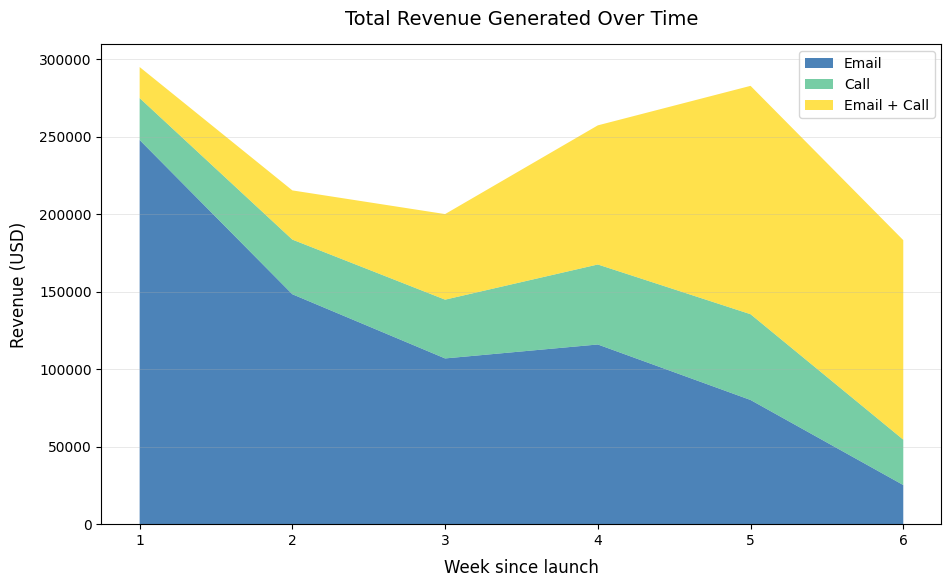

In [47]:
plt.figure(figsize=(14, 8))
plt.stackplot(weekly_total_revenue_by_sales_method.index, weekly_total_revenue_by_sales_method[['Email', 'Call', 'Email + Call']].values.T,  labels=['Email', 'Call', 'Email + Call'], colors=sales_method_palette.values(), alpha=0.7)

plt.legend(title='', labels=['Email', 'Call', 'Email + Call'], loc='upper right')
plt.title('Total Revenue Generated Over Time', fontsize=14, pad=14)
plt.xlabel('Week since launch', fontsize=12, labelpad=8)
plt.ylabel('Revenue (USD)', fontsize=12, labelpad=8)

plt.grid(True, axis='y', alpha=0.4, linestyle='-', linewidth=0.5)
plt.subplots_adjust(left=0.2, right=0.8, top=0.8, bottom=0.2)

plt.show()

## Do Individual Transaction Values Mirror Total Revenue Patterns?

Despite fluctuating total revenue, average transaction values have consistently increased over time for each sales method; with the combined Email+Call approach showing highest growth. <br>
This suggests that the changes in total revenue are due to drop in customers acquired via Email-only approach, and not due to decreasing transaction value.

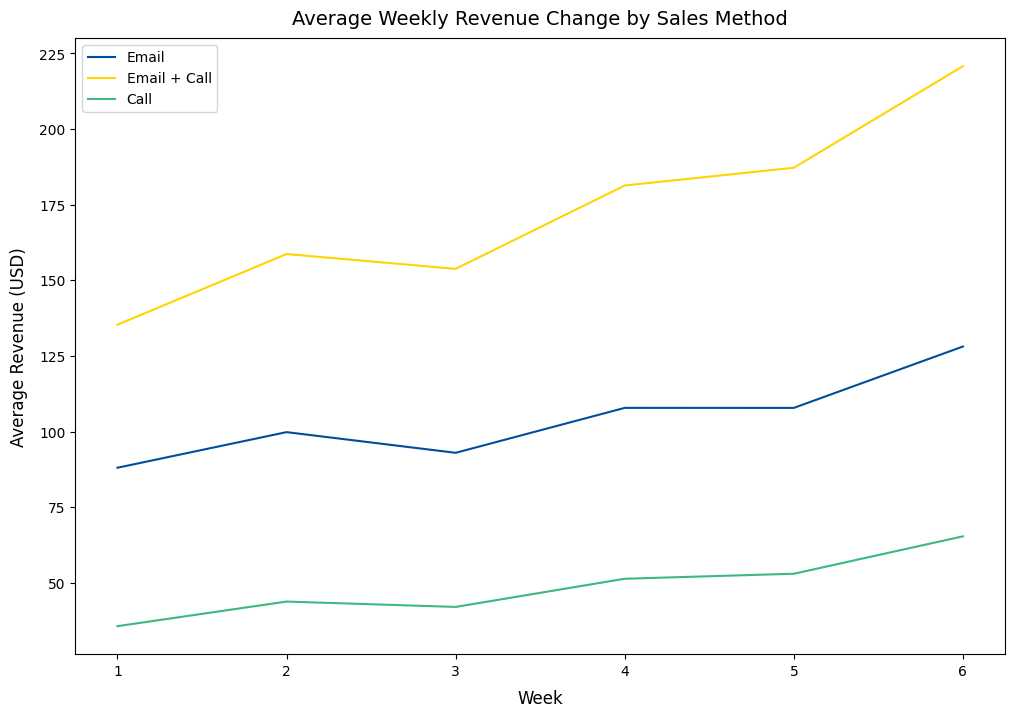

In [48]:
plt.figure(figsize=(12, 8))
sns.lineplot(x='week', y='revenue', data=sales, estimator='mean', hue='sales_method', palette=sales_method_palette, errorbar=None)

plt.legend(title='')
plt.title('Average Weekly Revenue Change by Sales Method', fontsize=14, pad=10)
plt.xlabel('Week', fontsize=12, labelpad=8)
plt.ylabel('Average Revenue (USD)', fontsize=12, labelpad=8)
plt.show()

## Sales Methods Performance across Customer Segments

The majority of customers have been with the company for 0 to 5 years.

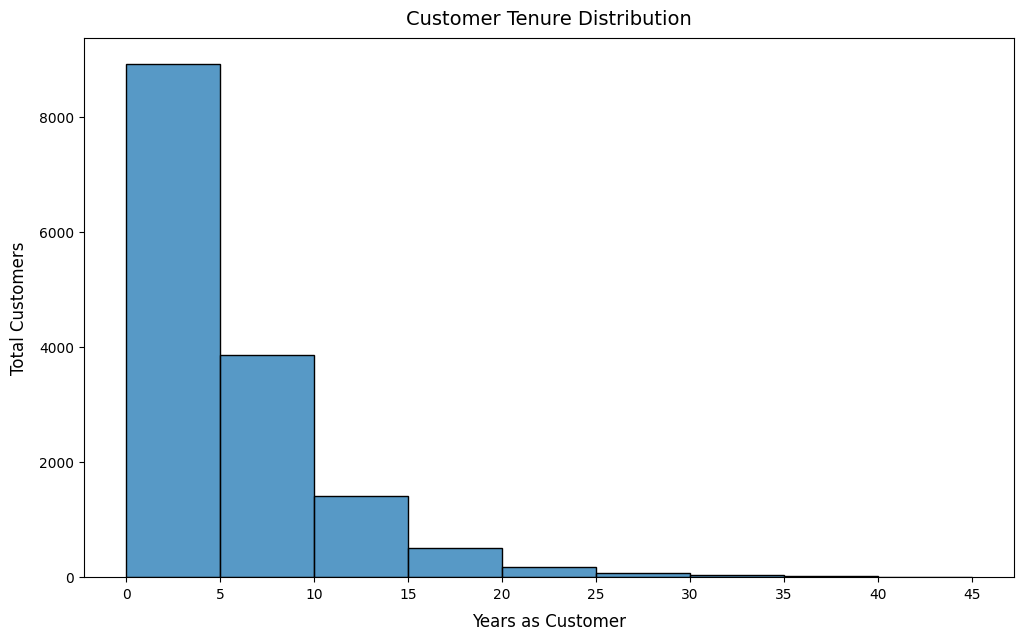

In [49]:
plt.figure(figsize=(12, 7))
sns.histplot(x='years_as_customer', bins=range(0, 46, 5), data=sales)
plt.xticks(range(0, 46, 5))
plt.title('Customer Tenure Distribution', fontsize=14, pad=10)
plt.xlabel('Years as Customer', fontsize=12, labelpad=8)
plt.ylabel('Total Customers', fontsize=12, labelpad=8)
plt.show()

I will group customers into following categories based on `years_as_customer`:
- New: 0-2 years
- Established: 2-5 years
- Long-term: 5-10 years
- Loyal: 10-15 years
- Legacy: 15+ years

In [50]:
customer_tenure_bins = [0, 2, 5, 10, 15, float('inf')]
customer_tenure_categories = ['New', 'Established', 'Long-term', 'Loyal', 'Legacy']

sales['customer_category'] = pd.cut(sales['years_as_customer'], bins=customer_tenure_bins, labels=customer_tenure_categories, include_lowest=True)

Sales method effectiveness shows no significant variation across customer segments, maintaining the same performance trends observed overall in customer acquisition and total revenue metrics.

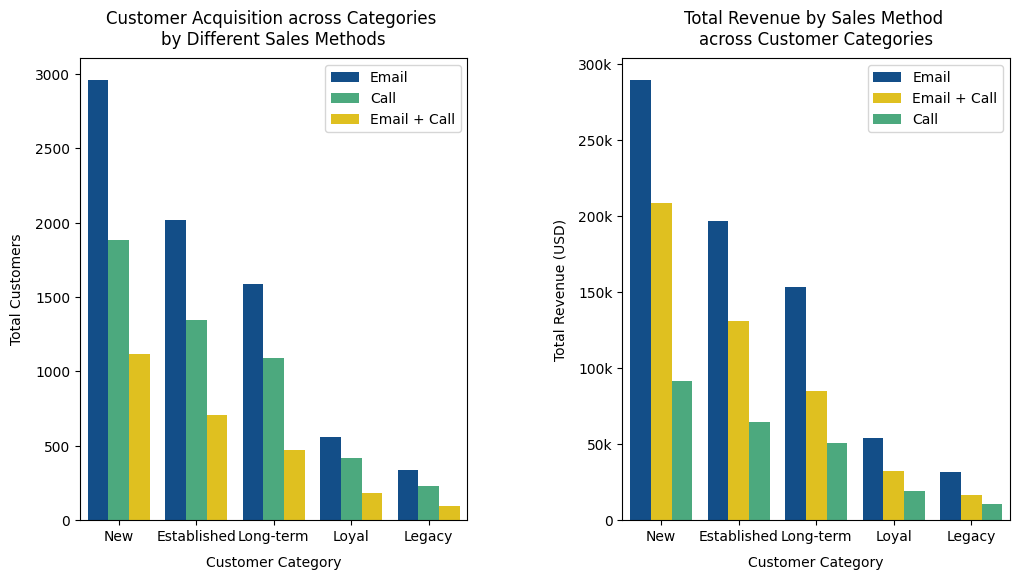

In [51]:
customers_by_category_sales_method = sales.groupby(['customer_category', 'sales_method'], as_index=False, observed=False)['customer_id'].size()

fig, ax = plt.subplots(1, 2, figsize=(12, 6))
sns.barplot(x='customer_category', y='size', data=customers_by_category_sales_method, estimator='sum', errorbar=None, 
            hue='sales_method', palette=sales_method_palette,  hue_order=['Email', 'Call', 'Email + Call'], ax=ax[0])
ax[0].legend(title='')
ax[0].set_title('Customer Acquisition across Categories \nby Different Sales Methods', pad=10)
ax[0].set_xlabel('Customer Category', labelpad=8)
ax[0].set_ylabel('Total Customers', labelpad=8)


sns.barplot(x='customer_category', y='revenue', data=sales, hue='sales_method', palette=sales_method_palette, estimator='sum', errorbar=None, ax=ax[1])
plt.legend(title='')
ax[1].set_title('Total Revenue by Sales Method \nacross Customer Categories', pad=10)
ax[1].set_xlabel('Customer Category', labelpad=8)
ax[1].set_ylabel('Total Revenue (USD)', labelpad=8)
ax[1].set_yticks(ticks=[0, 50000, 100000, 150000, 200000, 250000, 300000], labels=['0', '50k', '100k', '150k', '200k', '250k', '300k'])

plt.subplots_adjust(wspace=0.4)
plt.show()

## Regional Performance of Different Sales Methods

Email is the most common method of customer acquisition across all states. It also generates significant revenue (40-60%) in each state. It was most popular in Montana, and New Hampshire, and generated 66% and 62% of the revenue respectively.

Call-only campaigns consistently acquired more customers than Email+Call in each state. However, their revenue share is lower across every state. In fact, the Email+Call method had even higher revenue share than Email-only approach in Vermont, where it generated more than 50% revenue despite acquiring less than 30% customers.<br> This reveals that while Call-only method helps capture volume, Email+Call delivers significantly higher per-customer value, with this pattern remaining consistent nationwide regardless of geographic location. 

In [52]:
email_customers_by_state = sales[sales['sales_method'] == 'Email'].groupby('state', as_index=False).agg(total_customers = ('customer_id', 'count'))
call_customers_by_state = sales[sales['sales_method'] == 'Call'].groupby('state', as_index=False).agg(total_customers = ('customer_id', 'count'))
email_and_call_customers_by_state = sales[sales['sales_method'] == 'Email + Call'].groupby('state', as_index=False).agg(total_customers = ('customer_id', 'count'))

total_customers_by_state = sales.groupby('state', as_index=False).agg(total_customers = ('customer_id', 'count'))

email_customers_by_state['percent_customers'] = (email_customers_by_state['total_customers']/total_customers_by_state['total_customers'])*100
call_customers_by_state['percent_customers'] = (call_customers_by_state['total_customers']/total_customers_by_state['total_customers'])*100
email_and_call_customers_by_state['percent_customers'] = (email_and_call_customers_by_state['total_customers']/total_customers_by_state['total_customers'])*100

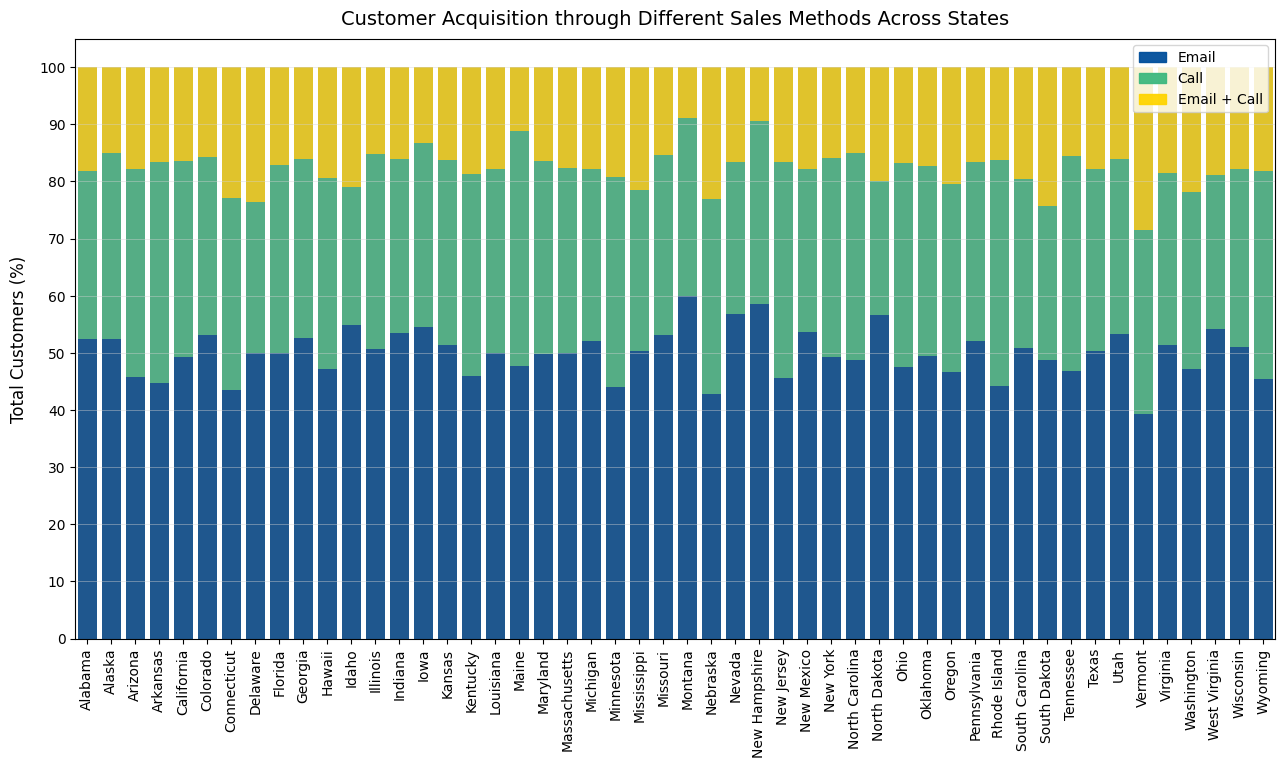

In [53]:
import matplotlib.patches as mpatches

plt.figure(figsize=(20, 10))
 
email_share = sns.barplot(x='state', y='percent_customers', data=email_customers_by_state,
                          color=sales_method_palette['Email'], alpha=0.95)
call_share = sns.barplot(x='state', y='percent_customers', data=call_customers_by_state,
                         color=sales_method_palette['Call'], bottom=email_customers_by_state['percent_customers'],
                        alpha=0.95)
email_and_call_share = sns.barplot(x='state', y='percent_customers', data=email_and_call_customers_by_state,
            color=sales_method_palette['Email + Call'], 
            bottom=email_customers_by_state['percent_customers']+call_customers_by_state['percent_customers'],
            alpha=0.95)

top_bar = mpatches.Patch(color=sales_method_palette['Email'], alpha=0.95, label='Email')
middle_bar = mpatches.Patch(color=sales_method_palette['Call'], alpha=0.95, label='Call')
bottom_bar = mpatches.Patch(color=sales_method_palette['Email + Call'], alpha=0.95, label='Email + Call')
plt.legend(handles=[top_bar, middle_bar, bottom_bar])

plt.title('Customer Acquisition through Different Sales Methods Across States', 
          fontsize=14, pad=10)
plt.xticks(rotation=90)
plt.xlabel('')
plt.yticks(range(0, 101, 10))
plt.ylabel('Total Customers (%)', fontsize=12, labelpad=8)

plt.grid(True, axis='y', alpha=0.6, linestyle='-', linewidth=0.5, color='#D3D3D3')
plt.subplots_adjust(left=0.2, right=0.8, top=0.8, bottom=0.2)
plt.show()

In [54]:
email_sales_by_state = sales[sales['sales_method']=='Email'].groupby('state', as_index=False)['revenue'].sum()
call_sales_by_state = sales[sales['sales_method']=='Call'].groupby('state', as_index=False)['revenue'].sum()
email_and_call_sales_by_state = sales[sales['sales_method']=='Email + Call'].groupby('state', as_index=False)['revenue'].sum()

total_sales_by_state = sales.groupby('state', as_index=False)['revenue'].sum()

email_sales_by_state['percent_revenue'] = (email_sales_by_state['revenue']/total_sales_by_state['revenue'])*100
call_sales_by_state['percent_revenue'] = (call_sales_by_state['revenue']/total_sales_by_state['revenue'])*100
email_and_call_sales_by_state['percent_revenue'] = (email_and_call_sales_by_state['revenue']/total_sales_by_state['revenue'])*100

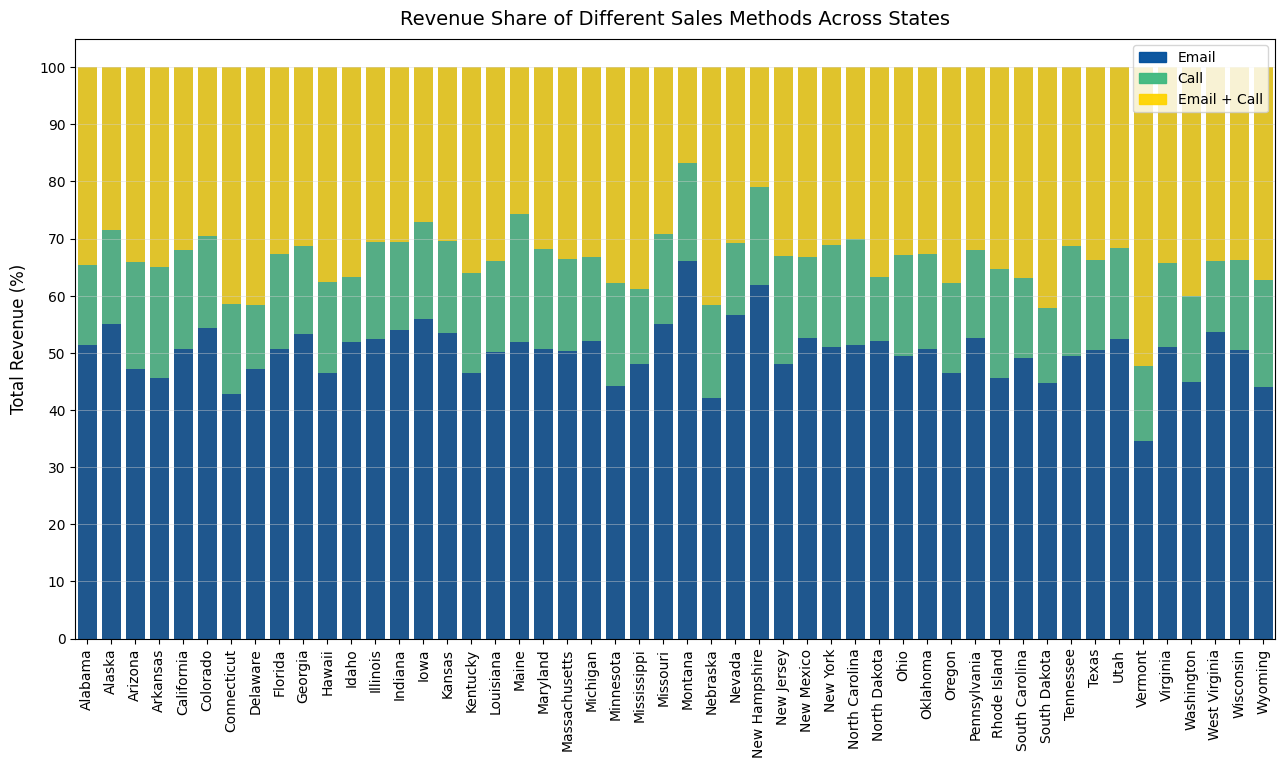

In [55]:
plt.figure(figsize=(20, 10))
 
email_share = sns.barplot(x='state', y='percent_revenue', data=email_sales_by_state,
                          color=sales_method_palette['Email'], alpha=0.95)
call_share = sns.barplot(x='state', y='percent_revenue', data=call_sales_by_state,
                         color=sales_method_palette['Call'], bottom=email_sales_by_state['percent_revenue'],
                         alpha=0.95)
email_and_call_share = sns.barplot(x='state', y='percent_revenue', data=email_and_call_sales_by_state,
                   color=sales_method_palette['Email + Call'], 
                   bottom=email_sales_by_state['percent_revenue']+call_sales_by_state['percent_revenue'],
                   alpha=0.95)

top_bar = mpatches.Patch(color=sales_method_palette['Email'], alpha=0.95, label='Email')
middle_bar = mpatches.Patch(color=sales_method_palette['Call'], alpha=0.95, label='Call')
bottom_bar = mpatches.Patch(color=sales_method_palette['Email + Call'], alpha=0.95, label='Email + Call')
plt.legend(handles=[top_bar, middle_bar, bottom_bar])

plt.title('Revenue Share of Different Sales Methods Across States', 
          fontsize=14, pad=10)
plt.xticks(rotation=90)
plt.xlabel('')
plt.yticks(range(0, 101, 10))
plt.ylabel('Total Revenue (%)', fontsize=12, labelpad=8)

plt.grid(True, axis='y', alpha=0.6, linestyle='-', linewidth=0.5, color='#D3D3D3')
plt.subplots_adjust(left=0.2, right=0.8, top=0.8, bottom=0.2)
plt.show()

# Business Metrics

Our goal is to identify the most effective sales techniques for product launches to maximize ROI. Therefore, I would recommend we use the **total weekly revenue by sales method** as our metric. It will help measure the actual financial impact of each approach. <br>
We should also keep track of the **total weekly customer acquisition by sales method** to understand the most effective methods for customer acquisition over time.

Based on the last 6 weeks of data, Email-only approach initially generated maximum revenue (\\$248k in first week), but later decreased significantly (to just \\$25k by week 6). On the other hand, the weekly revenue generated through the combined Email+Call approach increased by more than 6 times. It also has the highest revenue per-transaction. Therefore, if this increases further, it indicates a very good sign to maximize our ROI.<br>
The total number of customers acquired weekly was also highest by Email in the initial period, before decreasing significantly (~73% by week 5). Call-only and Email+Call approaches showed a consistent growth from approximately 750 to 1050 customers and from around 150 to 800 customers respectively until week 5. 

The number of customers acquired and revenue generated in week 6 was lowest overall. The combined Email+Call method was most effective in this week. 

# Recommendation

For future product launches, I would recommend:
- Prioritizing Email-only approach for volume-based strategies in the initial weeks.
- Focusing on Email+Call for high-value customer acquisition.

The call-only method may need strategic re-evaluation given its overall limited revenue potential despite acquiring one-third customers.